# Constants

In [ ]:
WORK_DIR_PATH = ".."

# Split
FILTER_BY = "user"
TRN_VAL_TST_RATIO = [0.8, 0.1, 0.1]
TRN_NEG_PER_POS_RATIO = 1
NEG_PER_POS_RATIO = [TRN_NEG_PER_POS_RATIO, TRN_NEG_PER_POS_RATIO, 100, 100]
BATCH_SIZE = [128, 128, 1, 1]

# Model
N_FACTORS = 32
HIDDEN = [N_FACTORS*2, N_FACTORS*2, N_FACTORS, N_FACTORS // 2]
DROPOUT = 0.2
MODEL_NAME = "NeuMF"

# How to Learn
TASK_TYPE = 'bpr'
LEARNING_RATE = 1e-4
LAMBDA_ = 1e-2

# Fit
N_EPOCHS = 450

# Config

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.chdir(WORK_DIR_PATH)
print(f"DIRECTORY: {os.getcwd()}")

DIRECTORY: c:\Users\jayar\Desktop\바탕 화면\DEGREE\RESEARCH-MLP


In [3]:
import json
import pandas as pd
import torch

In [4]:
import NeuMF
from MYUTILS import (
    ranking,
    utils,
)
from MYUTILS.config.constants import (
    DEFAULT_USER_COL,
    DEFAULT_ITEM_COL,
    DEFAULT_RATING_COL,
    DEFAULT_LABEL_COL,
    DEFAULT_TIMESTAMP_COL,
    DEFAULT_PREDICTION_COL,
    DEFAULT_K,
    SEED,
)

In [5]:
# Seed
utils.seed.reset(SEED)

SETTING ALL SEEDS TO 42...
ALL SEEDS SET


In [6]:
# Available GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Data Preparation

In [7]:
# JSON lines 형식의 파일 열기
with open('./data/abeauty.json', 'r', encoding='utf-8') as f:
    records = [json.loads(line) for line in f]

# reviewerID와 asin만 추출
filtered_records = [{'reviewerID': r['reviewerID'], 'asin': r['asin']} for r in records]

# DataFrame으로 변환
data = pd.DataFrame(filtered_records)

In [8]:
# Columns
kwargs = dict(
    col_user='reviewerID', 
    col_item='asin', 
)

data = utils.data.rename_columns(data, **kwargs)


# Label encoding
kwargs = dict(
    data=data, 
    col_user=DEFAULT_USER_COL, 
    col_item=DEFAULT_ITEM_COL,
)

data, user_label, item_label = utils.data.label_encoding(**kwargs)


# Number of user, item
N_USERS = data[DEFAULT_USER_COL].nunique()
N_ITEMS = data[DEFAULT_ITEM_COL].nunique()

In [9]:
# data Description
utils.data.description(data)

number of user: 3819
number of item: 1581
total interaction: 34278
interaction density: 0.5677 %
max interaction of user: 127
top 10.0 % interaction of user: 15.0
mean interaction of user: 8
mean interaction of item: 21


In [10]:
kwargs = dict(
    data=data,
    n_users=N_USERS,
    n_items=N_ITEMS,
    col_user=DEFAULT_USER_COL,
    col_item=DEFAULT_ITEM_COL,
)

dataloader = ranking.trn_val_tst.Module(**kwargs)

kwargs = dict(
    filter_by=FILTER_BY,
    trn_val_tst_ratio=TRN_VAL_TST_RATIO,
    neg_per_pos=NEG_PER_POS_RATIO,
    batch_size=BATCH_SIZE,
    seed=SEED,
    )

loaders, _ = dataloader.get(**kwargs)
trn_loader, val_loader, tst_loader, loo_loader = loaders

# Modeling

In [11]:
kwargs = dict(
    n_users=N_USERS,
    n_items=N_ITEMS,
    n_factors=N_FACTORS,
    hidden=HIDDEN,
    dropout=DROPOUT,
    model_name=MODEL_NAME,
)

model = NeuMF.model.Module(**kwargs)

In [12]:
kwargs = dict(
    model=model,
    trn_neg_per_pos_ratio=TRN_NEG_PER_POS_RATIO,
    task_type=TASK_TYPE,
    lr=LEARNING_RATE,
    lambda_=LAMBDA_,
)

loop = NeuMF.loop.Module(**kwargs)

# Train

In [ ]:
kwargs = dict(
    trn_loader=trn_loader,
    val_loader=val_loader,
    n_epochs=N_EPOCHS,
)

history = loop.fit(**kwargs)

EPOCH 1 START ---->>>>


Epoch 1/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 126.45it/s]


TRN TASK LOSS: 0.0721


Epoch 1/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 412.98it/s]


VAL TASK LOSS: 0.4513


Epoch 2/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 127.75it/s]


TRN TASK LOSS: 0.0673


Epoch 2/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 337.61it/s]


VAL TASK LOSS: 0.4331


Epoch 3/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 124.87it/s]


TRN TASK LOSS: 0.0697


Epoch 3/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 460.02it/s]


VAL TASK LOSS: 0.4360


Epoch 4/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 122.05it/s]


TRN TASK LOSS: 0.0694


Epoch 4/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 561.01it/s]


VAL TASK LOSS: 0.4337


Epoch 5/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 126.04it/s]


TRN TASK LOSS: 0.0665


Epoch 5/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 310.37it/s]


VAL TASK LOSS: 0.4517


Epoch 6/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 138.33it/s]


TRN TASK LOSS: 0.0698


Epoch 6/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 451.31it/s]


VAL TASK LOSS: 0.4560


Epoch 7/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 143.19it/s]


TRN TASK LOSS: 0.0684


Epoch 7/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 454.07it/s]


VAL TASK LOSS: 0.4341


Epoch 8/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 145.81it/s]


TRN TASK LOSS: 0.0704


Epoch 8/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 385.58it/s]


VAL TASK LOSS: 0.4215


Epoch 9/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 144.88it/s]


TRN TASK LOSS: 0.0712


Epoch 9/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 420.43it/s]


VAL TASK LOSS: 0.4397


Epoch 10/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 139.90it/s]


TRN TASK LOSS: 0.0670


Epoch 10/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 396.44it/s]


VAL TASK LOSS: 0.4537
EPOCH 11 START ---->>>>


Epoch 11/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 128.88it/s]


TRN TASK LOSS: 0.0694


Epoch 11/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 508.54it/s]


VAL TASK LOSS: 0.4630


Epoch 12/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 125.32it/s]


TRN TASK LOSS: 0.0691


Epoch 12/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 441.02it/s]


VAL TASK LOSS: 0.4449


Epoch 13/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 128.88it/s]


TRN TASK LOSS: 0.0705


Epoch 13/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 456.67it/s]


VAL TASK LOSS: 0.4716


Epoch 14/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 125.79it/s]


TRN TASK LOSS: 0.0715


Epoch 14/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 395.29it/s]


VAL TASK LOSS: 0.4738


Epoch 15/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 125.26it/s]


TRN TASK LOSS: 0.0738


Epoch 15/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 350.45it/s]


VAL TASK LOSS: 0.4789


Epoch 16/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 123.79it/s]


TRN TASK LOSS: 0.0672


Epoch 16/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 346.77it/s]


VAL TASK LOSS: 0.4721


Epoch 17/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 128.45it/s]


TRN TASK LOSS: 0.0717


Epoch 17/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 542.50it/s]


VAL TASK LOSS: 0.4349


Epoch 18/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 122.08it/s]


TRN TASK LOSS: 0.0667


Epoch 18/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 404.46it/s]


VAL TASK LOSS: 0.4681


Epoch 19/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 125.76it/s]


TRN TASK LOSS: 0.0692


Epoch 19/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 457.16it/s]


VAL TASK LOSS: 0.4540


Epoch 20/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 127.14it/s]


TRN TASK LOSS: 0.0712


Epoch 20/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 354.90it/s]


VAL TASK LOSS: 0.4520
EPOCH 21 START ---->>>>


Epoch 21/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 127.52it/s]


TRN TASK LOSS: 0.0688


Epoch 21/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 436.37it/s]


VAL TASK LOSS: 0.4267


Epoch 22/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 130.09it/s]


TRN TASK LOSS: 0.0674


Epoch 22/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 411.79it/s]


VAL TASK LOSS: 0.4454


Epoch 23/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 127.17it/s]


TRN TASK LOSS: 0.0694


Epoch 23/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 505.66it/s]


VAL TASK LOSS: 0.4494


Epoch 24/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 126.91it/s]


TRN TASK LOSS: 0.0683


Epoch 24/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 396.97it/s]


VAL TASK LOSS: 0.4419


Epoch 25/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 123.90it/s]


TRN TASK LOSS: 0.0703


Epoch 25/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 362.00it/s]


VAL TASK LOSS: 0.4253


Epoch 26/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 121.26it/s]


TRN TASK LOSS: 0.0700


Epoch 26/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 411.22it/s]


VAL TASK LOSS: 0.4194


Epoch 27/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 123.68it/s]


TRN TASK LOSS: 0.0715


Epoch 27/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 321.28it/s]


VAL TASK LOSS: 0.4446


Epoch 28/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 129.72it/s]


TRN TASK LOSS: 0.0674


Epoch 28/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 398.74it/s]


VAL TASK LOSS: 0.4351


Epoch 29/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 133.88it/s]


TRN TASK LOSS: 0.0654


Epoch 29/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 432.42it/s]


VAL TASK LOSS: 0.4213


Epoch 30/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 135.81it/s]


TRN TASK LOSS: 0.0704


Epoch 30/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 516.64it/s]


VAL TASK LOSS: 0.4382
EPOCH 31 START ---->>>>


Epoch 31/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 136.29it/s]


TRN TASK LOSS: 0.0684


Epoch 31/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 427.65it/s]


VAL TASK LOSS: 0.4403


Epoch 32/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 137.59it/s]


TRN TASK LOSS: 0.0666


Epoch 32/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 343.66it/s]


VAL TASK LOSS: 0.4510


Epoch 33/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 127.75it/s]


TRN TASK LOSS: 0.0672


Epoch 33/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 399.69it/s]


VAL TASK LOSS: 0.4319


Epoch 34/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 126.88it/s]


TRN TASK LOSS: 0.0672


Epoch 34/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 489.78it/s]


VAL TASK LOSS: 0.4421


Epoch 35/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 124.31it/s]


TRN TASK LOSS: 0.0666


Epoch 35/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 413.13it/s]


VAL TASK LOSS: 0.4528


Epoch 36/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 124.82it/s]


TRN TASK LOSS: 0.0677


Epoch 36/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 395.87it/s]


VAL TASK LOSS: 0.4570


Epoch 37/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 128.60it/s]


TRN TASK LOSS: 0.0654


Epoch 37/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 431.98it/s]


VAL TASK LOSS: 0.4724


Epoch 38/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 129.21it/s]


TRN TASK LOSS: 0.0620


Epoch 38/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 472.11it/s]


VAL TASK LOSS: 0.4499


Epoch 39/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 129.50it/s]


TRN TASK LOSS: 0.0685


Epoch 39/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 364.15it/s]


VAL TASK LOSS: 0.4206


Epoch 40/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 128.22it/s]


TRN TASK LOSS: 0.0682


Epoch 40/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 434.32it/s]


VAL TASK LOSS: 0.4841
EPOCH 41 START ---->>>>


Epoch 41/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 129.62it/s]


TRN TASK LOSS: 0.0735


Epoch 41/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 387.50it/s]


VAL TASK LOSS: 0.4313


Epoch 42/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 120.75it/s]


TRN TASK LOSS: 0.0672


Epoch 42/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 354.03it/s]


VAL TASK LOSS: 0.4493


Epoch 43/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 127.56it/s]


TRN TASK LOSS: 0.0649


Epoch 43/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 312.94it/s]


VAL TASK LOSS: 0.4262


Epoch 44/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 130.31it/s]


TRN TASK LOSS: 0.0658


Epoch 44/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 422.53it/s]


VAL TASK LOSS: 0.4462


Epoch 45/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 127.91it/s]


TRN TASK LOSS: 0.0658


Epoch 45/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 364.04it/s]


VAL TASK LOSS: 0.4367


Epoch 46/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 129.59it/s]


TRN TASK LOSS: 0.0631


Epoch 46/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 329.91it/s]


VAL TASK LOSS: 0.4484


Epoch 47/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 128.33it/s]


TRN TASK LOSS: 0.0645


Epoch 47/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 361.30it/s]


VAL TASK LOSS: 0.4268


Epoch 48/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 127.94it/s]


TRN TASK LOSS: 0.0646


Epoch 48/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 443.65it/s]


VAL TASK LOSS: 0.4757


Epoch 49/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 126.59it/s]


TRN TASK LOSS: 0.0646


Epoch 49/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 367.91it/s]


VAL TASK LOSS: 0.4345


Epoch 50/50 TRN: 100%|██████████| 170/170 [00:01<00:00, 129.99it/s]


TRN TASK LOSS: 0.0660


Epoch 50/50 VAL: 100%|██████████| 23/23 [00:00<00:00, 513.40it/s]

VAL TASK LOSS: 0.4531


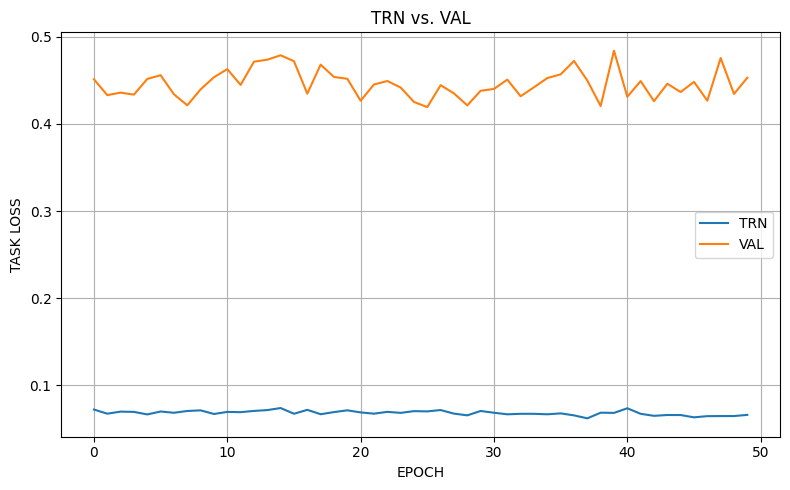

In [85]:
utils.vis.plot_loss(history, 'TASK LOSS')

# Test

In [86]:
TRUE_COL_LIST = [DEFAULT_USER_COL, DEFAULT_ITEM_COL, DEFAULT_LABEL_COL]
PRED_COL_LIST = [DEFAULT_USER_COL, DEFAULT_ITEM_COL, DEFAULT_PREDICTION_COL]

### TST Data

In [87]:
kwargs = dict(
    tst_loader=tst_loader,
)

result_tst = loop.predict(**kwargs)

TST: 100%|██████████| 2730/2730 [00:04<00:00, 612.63it/s]


In [88]:
TOP_K = 5

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@5: 0.513693
PRECISION@5: 0.105477
RECALL@5: 0.485699
MAP@5: 0.397098
NDCG@5: 0.423787
AGGDIV@5: 0.126678
MEAN NOVELTY@5: 10.123110
MEAN SERENDIPITY@5: 0.097261
PERSONALIZATION@5: 0.987200


In [89]:
TOP_K = 10

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.592314
PRECISION@10: 0.061882
RECALL@10: 0.559280
MAP@10: 0.407405
NDCG@10: 0.448392
AGGDIV@10: 0.068110
MEAN NOVELTY@10: 10.471035
MEAN SERENDIPITY@10: 0.054594
PERSONALIZATION@10: 0.985644


In [90]:
TOP_K = 15

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@15: 0.648410
PRECISION@15: 0.045583
RECALL@15: 0.612763
MAP@15: 0.411833
NDCG@15: 0.463059
AGGDIV@15: 0.046349
MEAN NOVELTY@15: 10.636461
MEAN SERENDIPITY@15: 0.029093
PERSONALIZATION@15: 0.982887


In [91]:
TOP_K = 20

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@20: 0.700972
PRECISION@20: 0.037125
RECALL@20: 0.662530
MAP@20: 0.414707
NDCG@20: 0.475192
AGGDIV@20: 0.034828
MEAN NOVELTY@20: 10.741763
MEAN SERENDIPITY@20: 0.022836
PERSONALIZATION@20: 0.979889


In [92]:
TOP_K = 50

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@50: 0.896643
PRECISION@50: 0.019682
RECALL@50: 0.863843
MAP@50: 0.421848
NDCG@50: 0.516934
AGGDIV@50: 0.013966
MEAN NOVELTY@50: 11.061656
MEAN SERENDIPITY@50: 0.012588
PERSONALIZATION@50: 0.961960


In [93]:
TOP_K = 100

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_tst[TRUE_COL_LIST],
    rating_pred=result_tst[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@100: 0.997792
PRECISION@100: 0.011466
RECALL@100: 0.982955
MAP@100: 0.424050
NDCG@100: 0.537863
AGGDIV@100: 0.006983
MEAN NOVELTY@100: 11.369872
MEAN SERENDIPITY@100: 0.007288
PERSONALIZATION@100: 0.936042


### Leave-One-Out Data

In [94]:
kwargs = dict(
    tst_loader=loo_loader,
)

result_loo = loop.predict(**kwargs)

TST: 100%|██████████| 3819/3819 [00:06<00:00, 591.43it/s]


In [95]:
TOP_K = 5

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_loo[TRUE_COL_LIST],
    rating_pred=result_loo[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@5: 0.461639
PRECISION@5: 0.092328
RECALL@5: 0.461639
MAP@5: 0.361216
NDCG@5: 0.386191
AGGDIV@5: 0.078764
MEAN NOVELTY@5: 10.152754
MEAN SERENDIPITY@5: 0.074051
PERSONALIZATION@5: 0.989186


In [96]:
TOP_K = 10

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_loo[TRUE_COL_LIST],
    rating_pred=result_loo[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.553286
PRECISION@10: 0.055329
RECALL@10: 0.553286
MAP@10: 0.373148
NDCG@10: 0.415524
AGGDIV@10: 0.041084
MEAN NOVELTY@10: 10.517134
MEAN SERENDIPITY@10: 0.039592
PERSONALIZATION@10: 0.986516


In [97]:
TOP_K = 15

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_loo[TRUE_COL_LIST],
    rating_pred=result_loo[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@15: 0.616392
PRECISION@15: 0.041093
RECALL@15: 0.616392
MAP@15: 0.378036
NDCG@15: 0.432127
AGGDIV@15: 0.027599
MEAN NOVELTY@15: 10.690556
MEAN SERENDIPITY@15: 0.027005
PERSONALIZATION@15: 0.983547


In [98]:
TOP_K = 20

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result_loo[TRUE_COL_LIST],
    rating_pred=result_loo[PRED_COL_LIST],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@20: 0.671380
PRECISION@20: 0.033569
RECALL@20: 0.671380
MAP@20: 0.381118
NDCG@20: 0.445104
AGGDIV@20: 0.020699
MEAN NOVELTY@20: 10.801221
MEAN SERENDIPITY@20: 0.020869
PERSONALIZATION@20: 0.980499
